In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import gmaps

# Import API key
from api_keys import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [2]:
# Store csv path ad name
csv = ("Resources/Cleaned_VCE_results_by_school.csv")

# Read in csv file
school_df = pd.read_csv(csv) 

# Geolocation visulaisation
This section provides an overarching investigation into acess to educational resources, need to keep in mind in alaysis that rural areas have less populaiton and thus most likely have less number of schools. This still provides visualisation of school number and lon lat distrubuiton:
* Geolocation school count pie chart
* School long and lat heat map
* Heat map for each geolocation lat and long

# Geolocation School Diversity
This section investigates access to educational resources based on geolocation. Counting school types and Sector. Also looking at a better data set of percentages for school type and sector for each geolocation:
* Each geolocation school type count, pie chart or histogram
* Each geolocation sector count, pie histogram
* Percentage of school type, histogram for geolocation
* Percentage of sector, histogram for geolocaiton
##### Academic sucess in Sector
since this is less directly relavent to the analysis it might be skiped but it could provide good information if sector does infact have an affect on academic sucess:
* Meadian study score box chart, gov, non-gov
* 40%+ gov non gov box chart
* bin of % Applying for Tertiary Study 

# Geolocaiton and Academic Sucess
This section investigates if geolocation does have an affect on academic success:
* Geolocation median ATAR box plots (as seen bellow, hopefully without null values)
* 40%+ geolocation box chart
* bin for % applying for tertiary study
* VET Certs With 2021 Enrolments
* Top 100 median VCE scores histogram 
* Top 100 median VCE scores heatmap

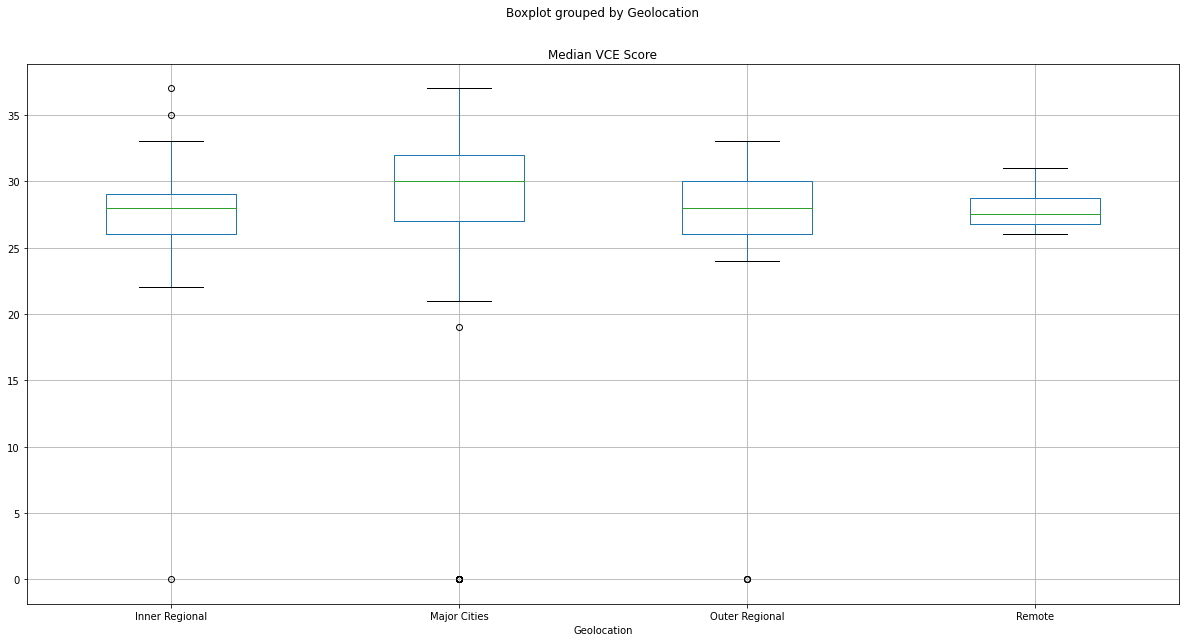

In [4]:
# Create a boxplot to compare means
school_df.boxplot("Median VCE Score", by="Geolocation", figsize=(20, 10))

# We may need to remove the Zeros from this in order not to skew the data??

In [5]:
school_df.dtypes

School Name                        object
Suburb                             object
Type                               object
Sector                             object
Geolocation                        object
Latitude                          float64
Longitude                         float64
VET Certs With 2021 Enrolments      int64
% Applying for Tertiary Study     float64
Median VCE Score                    int64
VCE 40+ %                         float64
dtype: object